## MNIST Network

The aim of this notebook is to train on the MNIST dataset a very simple fully connected network built from the Tensor class defined in toygrad.engine.

In [1]:
import sys
sys.path.append('../')

# Load packages
import numpy as np
import matplotlib.pyplot as plt
# Load toygrad 
from toygrad.nn.datasets.load import load_MNIST
from toygrad.nn.models import MNISTNetwork
from toygrad.nn.optim import SGD

### Load data

We start by loading the MNIST dataset, which we have conveniently stored in toygrad.nn.datasets

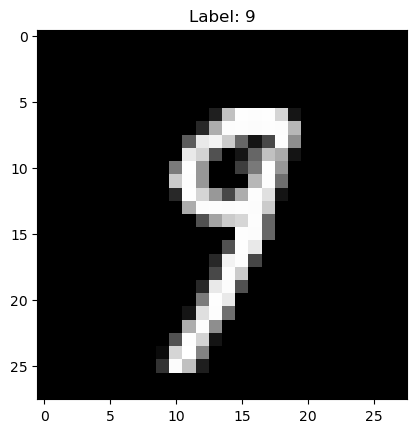

In [2]:
# Load MNIST data
data = load_MNIST()
train, validation, test = data

# Plot an example
rnd = 43
image, label = train[0][rnd].reshape(28, 28), train[1][rnd]
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

### Initialize Network

We now create the fully connected network with a single hidden layer, ReLU activation functions and Dropout layers.

In [3]:
# Initialize Network
np.random.seed(0)
layers_size = [28*28, 30, 10]
dropout_rate = 0.1
net = MNISTNetwork(layers_size, dropout_rate)

The model has 23,860 learnable parameters.


### Training

We can now train the model using the method that is already built in the MNISTNetwork class. 

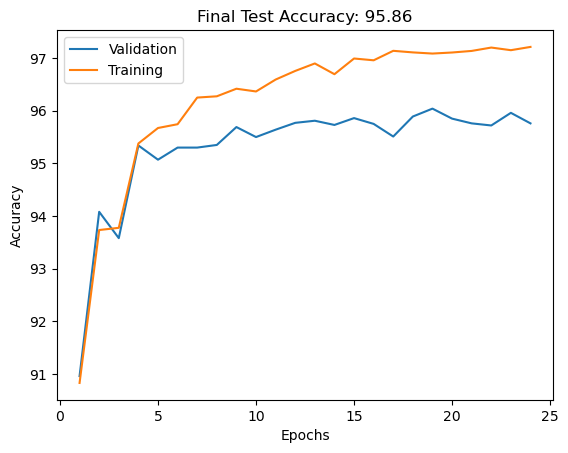

In [4]:
# Training parameters
batch_size = 10
epoch_tol = 4 # Max number of epochs we tolerate without improving val_accuracy
# SGD optimizer
optimizer = SGD(net.parameters, lr=1e-1)
save_model = 'MNIST_model'

# Train model
out = net.train_model(data, batch_size, optimizer, epoch_tol, save_model)  